## Clustering

### KMeans
Groups data into "k" clusters. The algorithm runs iteratively to assing datapoint to one of the groups based on the features.  
  
n_clusters: default 8, number of  clusters  
max_iter: default 300,  maximum number of iterations of the algorithm for a single run  
algorithm: default  lloyd, {"lloyd", "elkan", "auto", "fill"}

c:\Users\Patrick\Documents\GitHub\DataMiningNTNU\env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


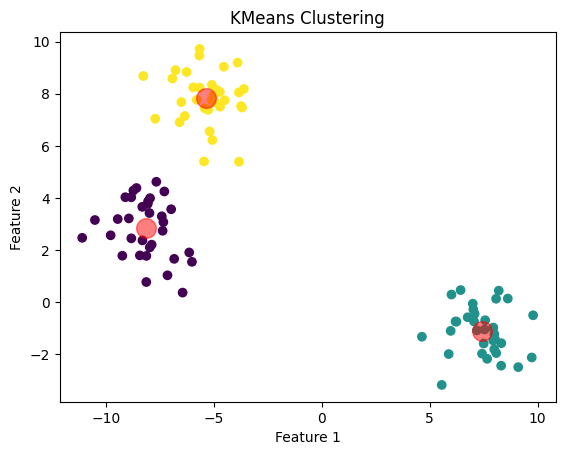

In [6]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# random cluster dataset
X, y = make_blobs()

kmeans = KMeans(n_clusters=3)

kmeans.fit(X)
y_pred = kmeans.predict(X)


plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);
plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### AgglomerativeClustering

AgglomerativeClustering is a type of hierarchical clustering that builds a hierarchy of clusters by merging or splitting existing groups. 

n_clusters: default 2, the number of clusters to find.

affinity: default "euclidean", metric used to compute the linkage. Can be "euclidean", "l1", "l2", "manhattan", "cosine", or "precomputed". If linkage is "ward", only "euclidean" is accepted.

memory: default None, used to cache the output of the computation of the tree. By default, no caching is performed. If a string is given, it is the path to the caching directory.

compute_full_tree: default 'auto', stop early the construction of the tree at n_clusters. Useful only when specifying a connectivity matrix. 'auto' mode leaves the decision to the algorithm.

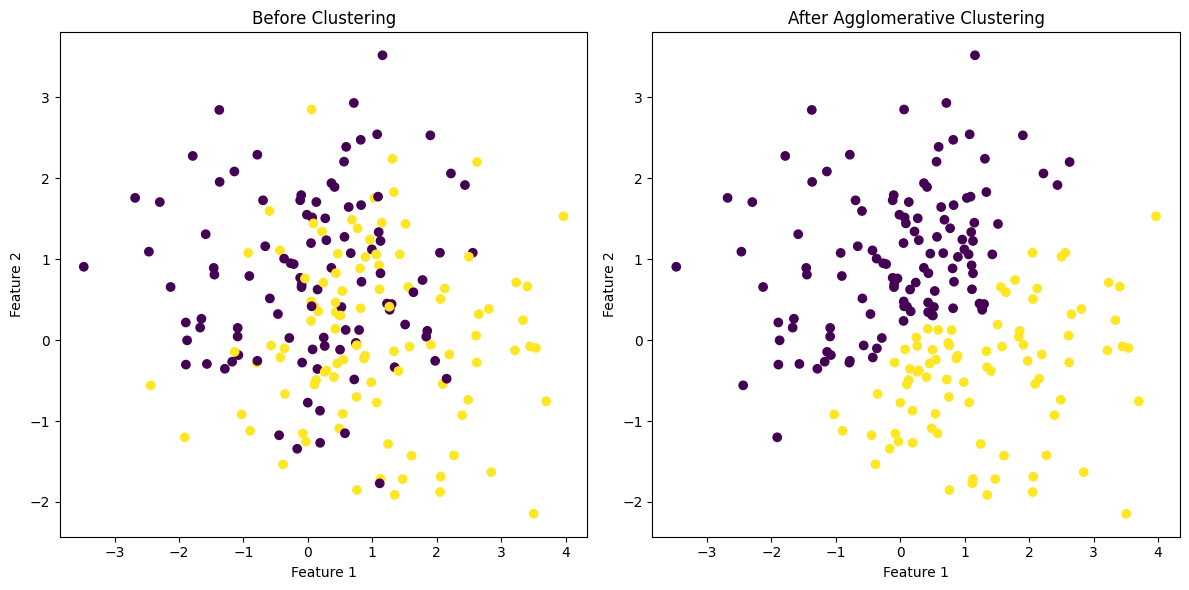

In [17]:
from sklearn.datasets import make_moons
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=200, noise=1, random_state=42)

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Before Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

agg = AgglomerativeClustering(n_clusters=2)

assignment = agg.fit_predict(X)

plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c=assignment, cmap='viridis')
plt.title('After Agglomerative Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.tight_layout()
plt.show()

### DBSCAN
DBSCAN is a density-based clustering algorithm that can identify clusters of different shapes and sizes. It doesn't require setting the number of clusters but needs two parameters:

- eps: Maximum distance between two samples to be in the same neighborhood.
- min_samples: Number of samples in a neighborhood for a point to be a core point.

It uses a metric for distance calculation (default 'euclidean') and an algorithm for computing pointwise distances and finding nearest neighbors (default 'auto').

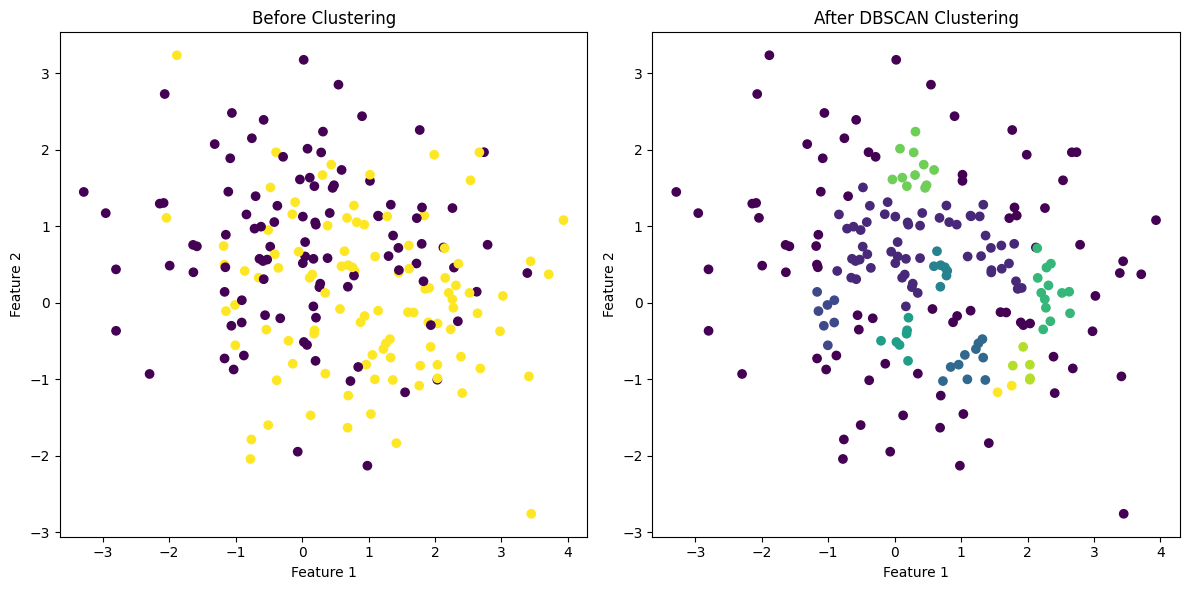

In [29]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=200, noise=1, random_state=1023)

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Before Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

dbscan = DBSCAN(eps=0.3, min_samples=5)

y_pred = dbscan.fit_predict(X)

plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis')
plt.title('After DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.tight_layout()
plt.show()

## Clustering Evaluation

### normalized_mutual_info_score
Function that measures the similarity of two labels of the same data. Values range from 0 (no mutual information) to 1 (perfect correlation).

In [26]:
from sklearn.metrics.cluster import normalized_mutual_info_score

labels_true = [0, 0, 0, 1, 1, 1]

labels_pred = [0, 0, 1, 1, 2, 2]

nmi = normalized_mutual_info_score(labels_true, labels_pred)

print(f'Normalized Mutual Information: {nmi:.2f}')

Normalized Mutual Information: 0.52


### silhouette_score

Used to calculate the how good a clustering technique is. Ranges from -1 to 1. 

1: Means clusters are well apart from each other and clearly distinguished.
0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.
-1: Means clusters are assigned in the wrong way.

In [28]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

X, _ = make_blobs(random_state=1)

kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(X)
score = silhouette_score(X, labels)

print(f'Silhouette Score: {score:.2f}')

Silhouette Score: 0.77


c:\Users\Patrick\Documents\GitHub\DataMiningNTNU\env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
